In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects

In [2]:
df = pd.read_csv('https://storage.googleapis.com/courses_data/Assignment%20CSV/finance_liquor_sales.csv')

In [3]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-31797900035,2020-11-10,4967,Jeff's Market / Blue Grass,"102, W Mayne St",Blue Grass,52726.0,POINT (-90.766126 41.509119),82.0,SCOTT,...,26858,Templeton 4YR Rye,12,375,9.99,14.99,1,14.99,0.37,0.09
1,INV-23548800092,2019-11-27,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51.0,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
2,INV-23609300026,2019-12-02,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803.0,NaN,82.0,SCOTT,...,41844,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29
3,INV-39482900037,2021-08-24,3719,Wal-Mart 0581 / Marshalltown,2802 S Center St,Marshalltown,50158.0,POINT (-92.91231 42.012918),64.0,MARSHALL,...,65259,Jagermeister Liqueur Mini Meisters,12,20,4.93,7.40,12,88.80,0.24,0.06
4,INV-39520400088,2021-08-25,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201.0,POINT (-95.854899 43.184242),71.0,OBRIEN,...,77487,Tortilla Gold DSS,12,1000,4.85,7.28,4,29.12,4.00,1.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  200 non-null    object 
 1   date                     200 non-null    object 
 2   store_number             200 non-null    int64  
 3   store_name               200 non-null    object 
 4   address                  200 non-null    object 
 5   city                     200 non-null    object 
 6   zip_code                 200 non-null    float64
 7   store_location           182 non-null    object 
 8   county_number            199 non-null    float64
 9   county                   199 non-null    object 
 10  category                 197 non-null    float64
 11  category_name            191 non-null    object 
 12  vendor_number            200 non-null    float64
 13  vendor_name              200 non-null    object 
 14  item_number              2

## Data Cleaning 

In [5]:
df.isnull().sum()

invoice_and_item_number     0
date                        0
store_number                0
store_name                  0
address                     0
city                        0
zip_code                    0
store_location             18
county_number               1
county                      1
category                    3
category_name               9
vendor_number               0
vendor_name                 0
item_number                 0
item_description            0
pack                        0
bottle_volume_ml            0
state_bottle_cost           0
state_bottle_retail         0
bottles_sold                0
sale_dollars                0
volume_sold_liters          0
volume_sold_gallons         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 198
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  173 non-null    object 
 1   date                     173 non-null    object 
 2   store_number             173 non-null    int64  
 3   store_name               173 non-null    object 
 4   address                  173 non-null    object 
 5   city                     173 non-null    object 
 6   zip_code                 173 non-null    float64
 7   store_location           173 non-null    object 
 8   county_number            173 non-null    float64
 9   county                   173 non-null    object 
 10  category                 173 non-null    float64
 11  category_name            173 non-null    object 
 12  vendor_number            173 non-null    float64
 13  vendor_name              173 non-null    object 
 14  item_number              173 no

## Date manipulation

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['year'] = df['date'].dt.year

In [11]:
df['month'] = df['date'].dt.month

## 2016-2019 Data

In [12]:
data_2016_2019 = df[(df['year'] >= 2016) & (df['year'] <= 2019)]

In [13]:
data_2016_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1 to 197
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  60 non-null     object        
 1   date                     60 non-null     datetime64[ns]
 2   store_number             60 non-null     int64         
 3   store_name               60 non-null     object        
 4   address                  60 non-null     object        
 5   city                     60 non-null     object        
 6   zip_code                 60 non-null     float64       
 7   store_location           60 non-null     object        
 8   county_number            60 non-null     float64       
 9   county                   60 non-null     object        
 10  category                 60 non-null     float64       
 11  category_name            60 non-null     object        
 12  vendor_number            60 non-null     f

In [14]:
data_2016_2019['zip_code'] = data_2016_2019['zip_code'].astype(int)

C:\Users\tomah\AppData\Local\Temp\ipykernel_12792\3870406734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_2019['zip_code'] = data_2016_2019['zip_code'].astype(int)


## Most popular item per zip code

In [15]:
popular_items = data_2016_2019.groupby(['zip_code', 'item_description'])['bottles_sold'].sum()
popular_items = popular_items.loc[popular_items.groupby('zip_code').idxmax()]

In [16]:
popular_items.head()

zip_code  item_description             
50010     Member's Mark Spiced Rum         288
50022     Paramount Triple Sec               4
50131     Platinum 7x Vodka                 48
50158     Kamora Coffee Liqueur              6
50263     Jagermeister w/2 Shot Glasses     84
Name: bottles_sold, dtype: int64

In [17]:
popular_items = popular_items.reset_index()

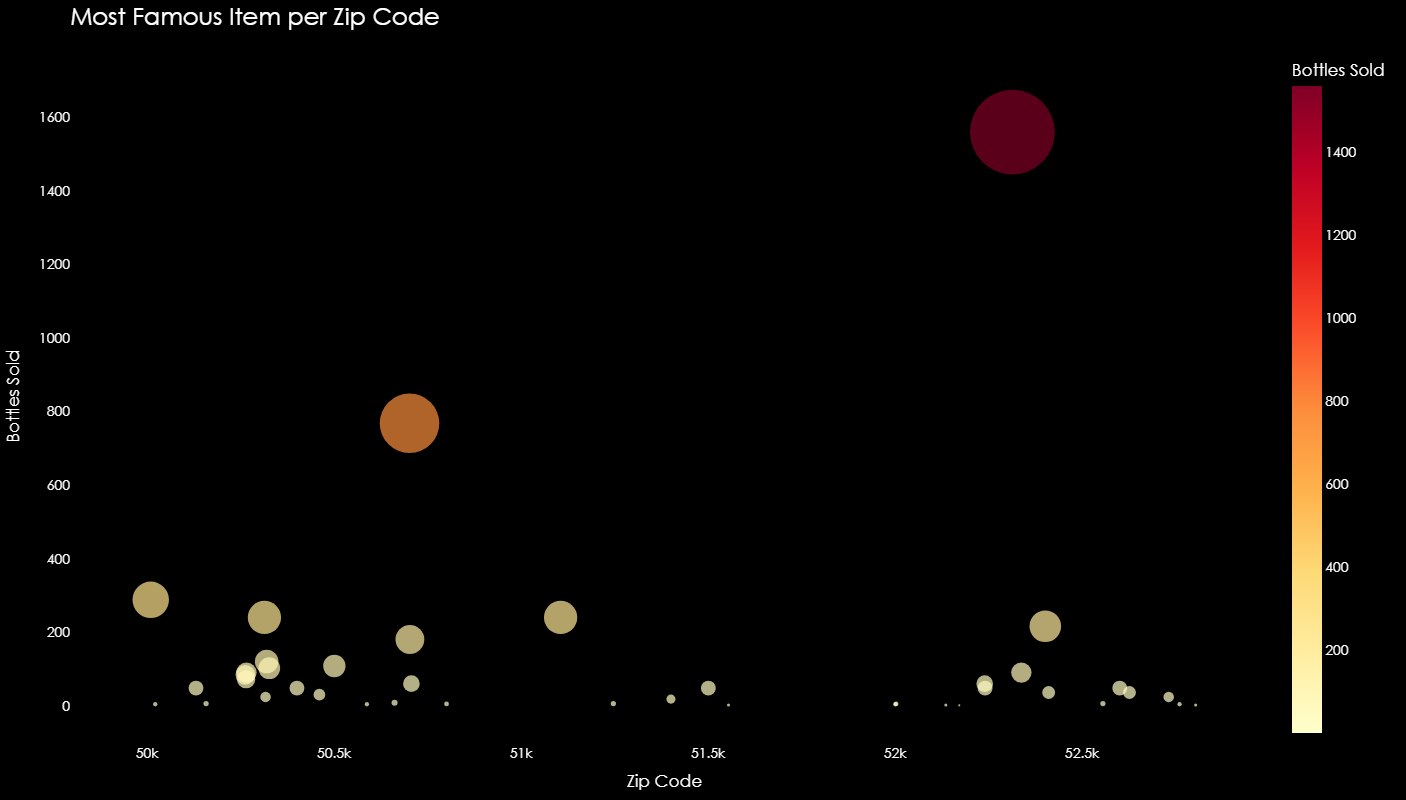

In [30]:

fig = px.scatter(
    popular_items,
    x='zip_code',
    y='bottles_sold',
    size='bottles_sold',
    color='bottles_sold',
    color_continuous_scale='YlOrRd',
    title='Most Famous Item per Zip Code',
    labels={'zip_code': 'Zip Code', 'bottles_sold': 'Bottles Sold'},
    hover_data={'item_description': True, 'bottles_sold': True},
    size_max=60
)

fig.update_traces(marker=dict(
    line=dict(width=0)  
))

fig.update_layout(
    title='Most Famous Item per Zip Code',
    title_font=dict(
        family='Century Gothic',
        size=24,
        color='white',
        weight='normal'
    ),
    font=dict(
        family='Century Gothic',
        size=14,
        color='white',
        weight='normal'
    ),
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        tickcolor='white',
        title_font=dict(color='white', weight='normal'),
        tickfont=dict(color='white', weight='normal')
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        tickcolor='white',
        title_font=dict(color='white', weight='normal'),
        tickfont=dict(color='white', weight='normal')
    ),
    showlegend=True,
    legend=dict(
        font=dict(
            family='Century Gothic',
            size=12,
            color='white',
            weight='normal'
        ),
        bgcolor='rgba(0, 0, 0, 0.5)'
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    width=1200,
    height=800
)

fig.show()


## % of Total Sales per Store

In [33]:
sales_per_store = data_2016_2019[['store_name','sale_dollars']]

In [38]:
sales_per_store = data_2016_2019.groupby('store_name')['sale_dollars'].sum().reset_index()
sales_per_store['percentage_of_total_sales'] = sales_per_store['sale_dollars'] / data_2016_2019['sale_dollars'].sum()

In [40]:
sales_per_store= sales_per_store.sort_values(by = 'percentage_of_total_sales', ascending=False)

In [41]:
sales_per_store

,store_name,sale_dollars,percentage_of_total_sales
49,Wilkie Liquors,11620.80,0.205418
41,Sam's Club 6432 / Sioux City,6641.04,0.117392
42,Sam's Club 6514 / Waterloo,5199.36,0.091908
14,Hy-Vee #3 / BDI / Des Moines,4124.04,0.072900
43,Sam's Club 6568 / Ames,3913.92,0.069185
2,Cedar Ridge Vineyards,3712.50,0.065625
32,Hy-Vee Wine and Spirits / WDM,3372.30,0.059611
8,Fareway Stores #138 / Pleasant Hill,2295.00,0.040568
19,Hy-Vee Food Store #2 / Waterloo,1992.15,0.035215
24,Hy-Vee Food Store / Fort Dodge,1563.84,0.027644


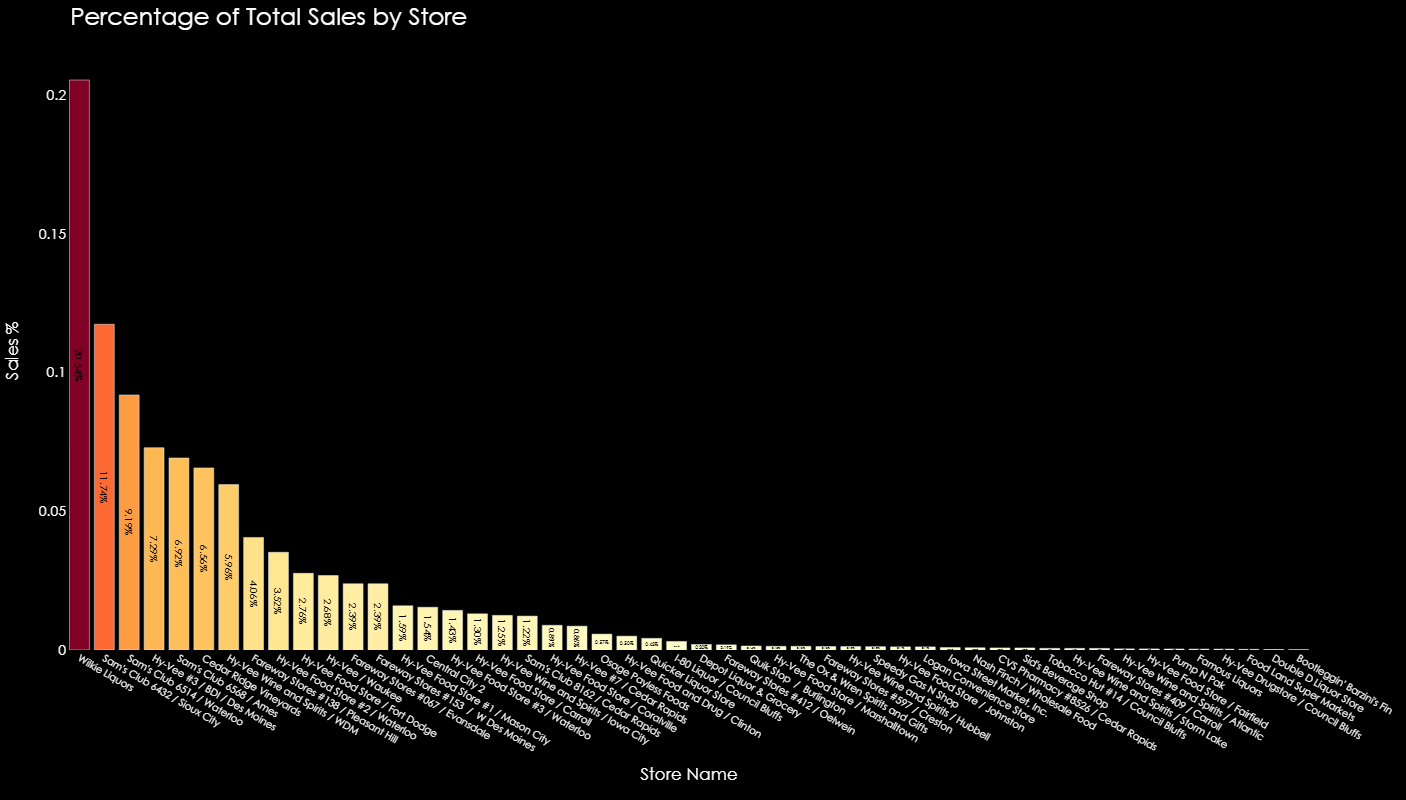

In [64]:

fig = px.bar(
    sales_per_store,
    x='store_name', 
    y='percentage_of_total_sales',
    title='Percentage of Total Sales by Store',
    labels={'store_name': 'Store Name', 'percentage_of_total_sales': 'Sales %'},
    text='percentage_of_total_sales'  
)


fig.update_layout(
    title='Percentage of Total Sales by Store',
    title_font=dict(
        family='Century Gothic',
        size=24,
        color='white',
        weight='normal'
    ),
    font=dict(
        family='Century Gothic',
        size=14,
        color='white',
        weight='normal'
    ),
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        tickcolor='white',
        title_font=dict(color='white', weight='normal'),
        tickfont=dict(size=10, color='white')  
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        tickcolor='white',
        title_font=dict(color='white', weight='normal'),
        tickfont=dict(color='white', weight='normal')
    ),
    margin=dict(l=50, r=50, t=50, b=150),  
    width=1200,
    height=800,
    bargap=0.2
)


fig.update_traces(
    marker=dict(
        color=sales_per_store['percentage_of_total_sales'],  
        colorscale='YlOrRd'
    ),
    texttemplate='%{text:.2%}', 
    textposition='inside',       
    insidetextanchor='middle',   
    textfont=dict(
        size=10,  
        color='black'  
    )
)

fig.show()

